
# Libraries and Import Functions


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import implicit
from scipy.sparse import coo_matrix
from implicit.evaluation import mean_average_precision_at_k
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Data Cleaning



# Customers data

In [57]:
customers=pd.read_csv('customers.csv')

In [4]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
enco=LabelEncoder()
enco.fit_transform(customers['club_member_status'])


array([0, 0, 0, ..., 0, 0, 2])

In [6]:
customers.shape

(1371980, 7)

In [7]:
customers.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [8]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [9]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [10]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [11]:
club_member_one_hot=pd.get_dummies(customers['club_member_status'])
club_member_one_hot

,ACTIVE,LEFT CLUB,PRE-CREATE
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1371975,1,0,0
1371976,1,0,0
1371977,1,0,0
1371978,1,0,0


In [12]:
customers=customers.join(club_member_one_hot)
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,ACTIVE,LEFT CLUB,PRE-CREATE
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1,0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,None,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1,0,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,None,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1,0,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,None,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1,0,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,1,0,0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1,0,0


In [13]:
fashion_news_freq_one_hot=pd.get_dummies(customers['fashion_news_frequency'])
fashion_news_freq_one_hot

,Monthly,None,Regularly
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
1371975,0,1,0
1371976,0,1,0
1371977,0,0,1
1371978,0,0,1


In [14]:
customers=customers.join(fashion_news_freq_one_hot)
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,ACTIVE,LEFT CLUB,PRE-CREATE,Monthly,None,Regularly
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1,0,0,0,1,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,0,0,0,1,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,1,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,None,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1,0,0,0,1,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,None,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1,0,0,0,1,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,None,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1,0,0,0,1,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,1,0,0,0,0,1
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1,0,0,0,0,1


In [15]:
customers.info


<bound method DataFrame.info of                                                customer_id   FN  Active  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
...                                                    ...  ...     ...   
1371975  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  NaN     NaN   
1371976  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  NaN     NaN   
1371977  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  1.0     1.0   
1371978  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  1.0     1.0   
1371979  ffffd9ac14e89946416d80e791d064701994755c3ab686...  NaN     NaN   

        club_member_status fashion_news_frequency   age  \
0       

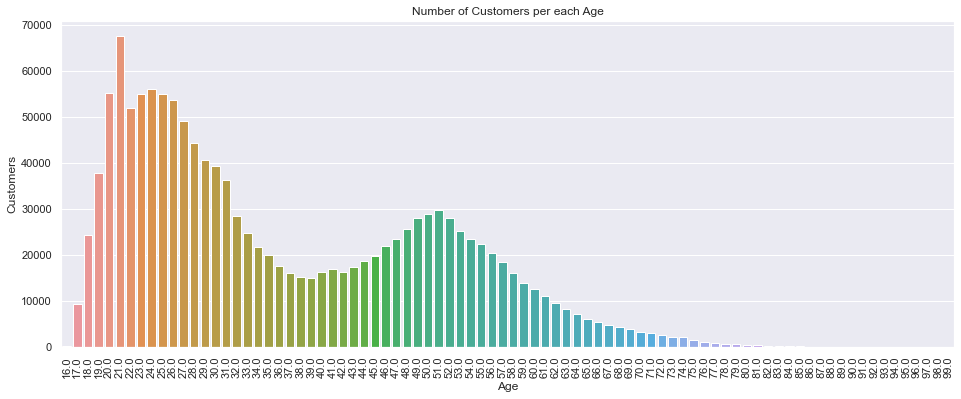

In [60]:
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

# Articles Data

This table contains all h&m articles with details such as a type of product, a color, a product group and other features.
Article data description:

article_id : A unique identifier of every article.
product_code, prod_name : A unique identifier of every product and its name (not the same).
product_type, product_type_name : The group of product_code and its name
graphical_appearance_no, graphical_appearance_name : The group of graphics and its name
colour_group_code, colour_group_name : The group of color and its name
perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : The added color info
department_no, department_name: : A unique identifier of every dep and its name
index_code, index_name: : A unique identifier of every index and its name
index_group_no, index_group_name: : A group of indeces and its name
section_no, section_name: : A unique identifier of every section and its name
garment_group_no, garment_group_name: : A unique identifier of every garment and its name
detail_desc: : Details

In [16]:
articles=pd.read_csv('articles.csv')

In [17]:
articles.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [18]:
articles.shape

(105542, 25)

In [19]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [20]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [21]:
articles=articles.dropna()

In [22]:
articles



,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [23]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8863
                  Children Accessories, Swimwear     4592
                  Children Sizes 134-170             9190
                  Children Sizes 92-140             11974
Divided           Divided                           15086
Ladieswear        Ladies Accessories                 6885
                  Ladieswear                        25912
                  Lingeries/Tights                   6726
Menswear          Menswear                          12539
Sport             Sport                              3359
Name: article_id, dtype: int64

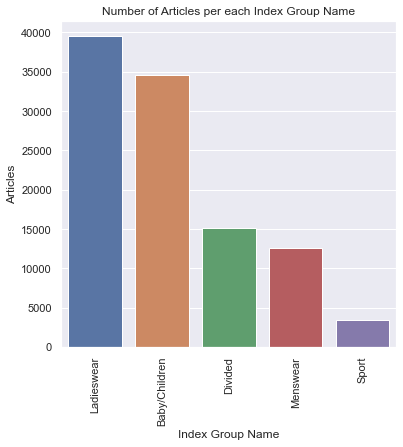

In [66]:
temp = articles.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()





# Sample Submissions

In [24]:
sample_submissions=pd.read_csv('sample_submission.csv')

In [25]:
sample_submissions.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [26]:
sample_submissions.shape

(1371980, 2)

In [27]:
sample_submissions.nunique()

customer_id    1371980
prediction           1
dtype: int64

In [28]:
sample_submissions.isnull().sum()

customer_id    0
prediction     0
dtype: int64

In [29]:
sample_submissions.dropna()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


# Transactions Train

In [30]:
transactions_train=pd.read_csv('transactions_train.csv')

In [31]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [32]:
print(transactions_train.shape)

(31788324, 5)


In [33]:
transactions_train.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [34]:
transactions_train.dropna()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


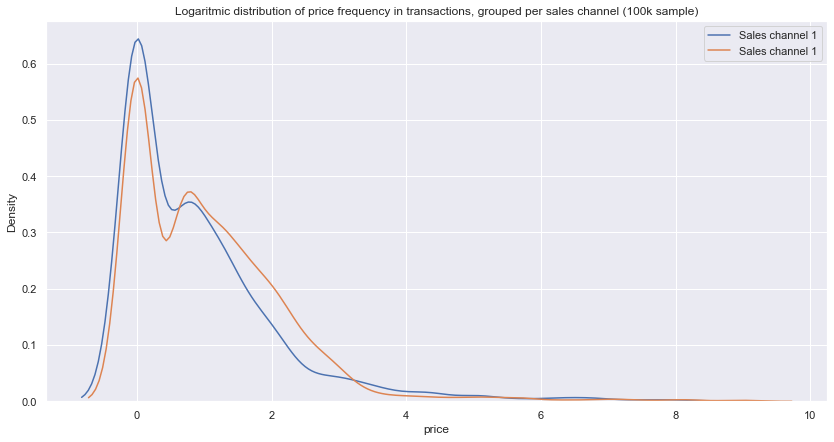

In [61]:
df = transactions_train.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 1'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()


# EDA

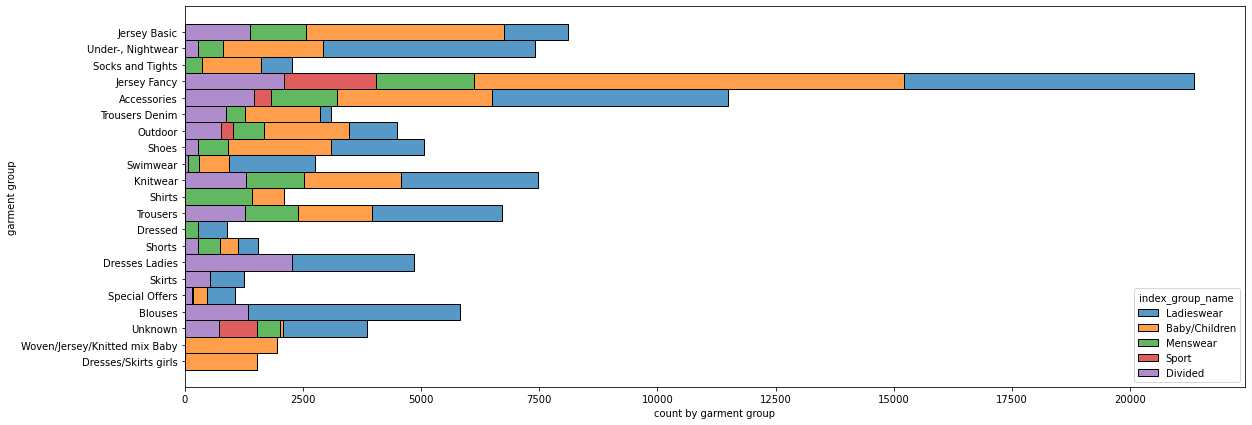

In [35]:
f, ax = plt.subplots(figsize=(19, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='green', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

We try to group the most popular items purchased to the accounts purchasing them the most.
The accounts with the most purchases are stored and recommended similar items which an algorithm suggests would be a good fit for them.

In [36]:
pd.DataFrame(articles.groupby(['index_group_name', 'index_name']).count()['article_id'])

article_id
index_group_name index_name                                
Baby/Children    Baby Sizes 50-98                      8863
                 Children Accessories, Swimwear        4592
                 Children Sizes 134-170                9190
                 Children Sizes 92-140                11974
Divided          Divided                              15086
Ladieswear       Ladies Accessories                    6885
                 Ladieswear                           25912
                 Lingeries/Tights                      6726
Menswear         Menswear                             12539
Sport            Sport                                 3359

In [37]:
pd.DataFrame(articles.groupby(['product_group_name','product_type_name']).count()['article_id'])

article_id
product_group_name  product_type_name            
Accessories         Accessories set             7
                    Alice band                  6
                    Baby Bib                    3
                    Bag                      1279
                    Beanie                     56
...                                           ...
Underwear           Underwear corset            7
                    Underwear set              47
Underwear/nightwear Sleep Bag                   6
                    Sleeping sack              48
Unknown             Unknown                   121

[132 rows x 1 columns]

We are trying to find out commonalities between someone`s geographical location and the items they purchase

In [38]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,ACTIVE,LEFT CLUB,PRE-CREATE,Monthly,None,Regularly
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,120303,118002,120303,120303,120303,120303,120303,120303
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260,261,261,261,261,261,261
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158,159,159,159,159,159,159
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,157,156,157,157,157,157,157,157
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155,156,156,156,156,156,156


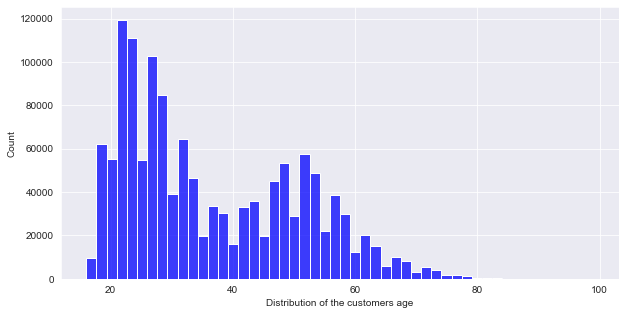

In [39]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='blue')
ax.set_xlabel('Distribution of the customers age')
plt.show()

In [40]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

Text(16.200000000000003, 0.5, 'Purchases')

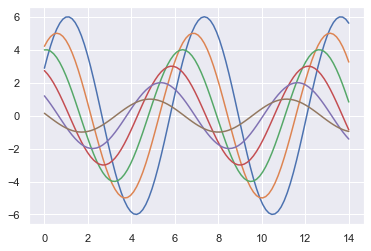

In [41]:
sns.set_theme()
sinplot()
ax.set_xlabel('Customers')
ax.set_ylabel('Purchases')

We will now try to represent this data as a heatmap, the greater the value closer to 1 , the more likely the customer is to buy the product!

<AxesSubplot:>

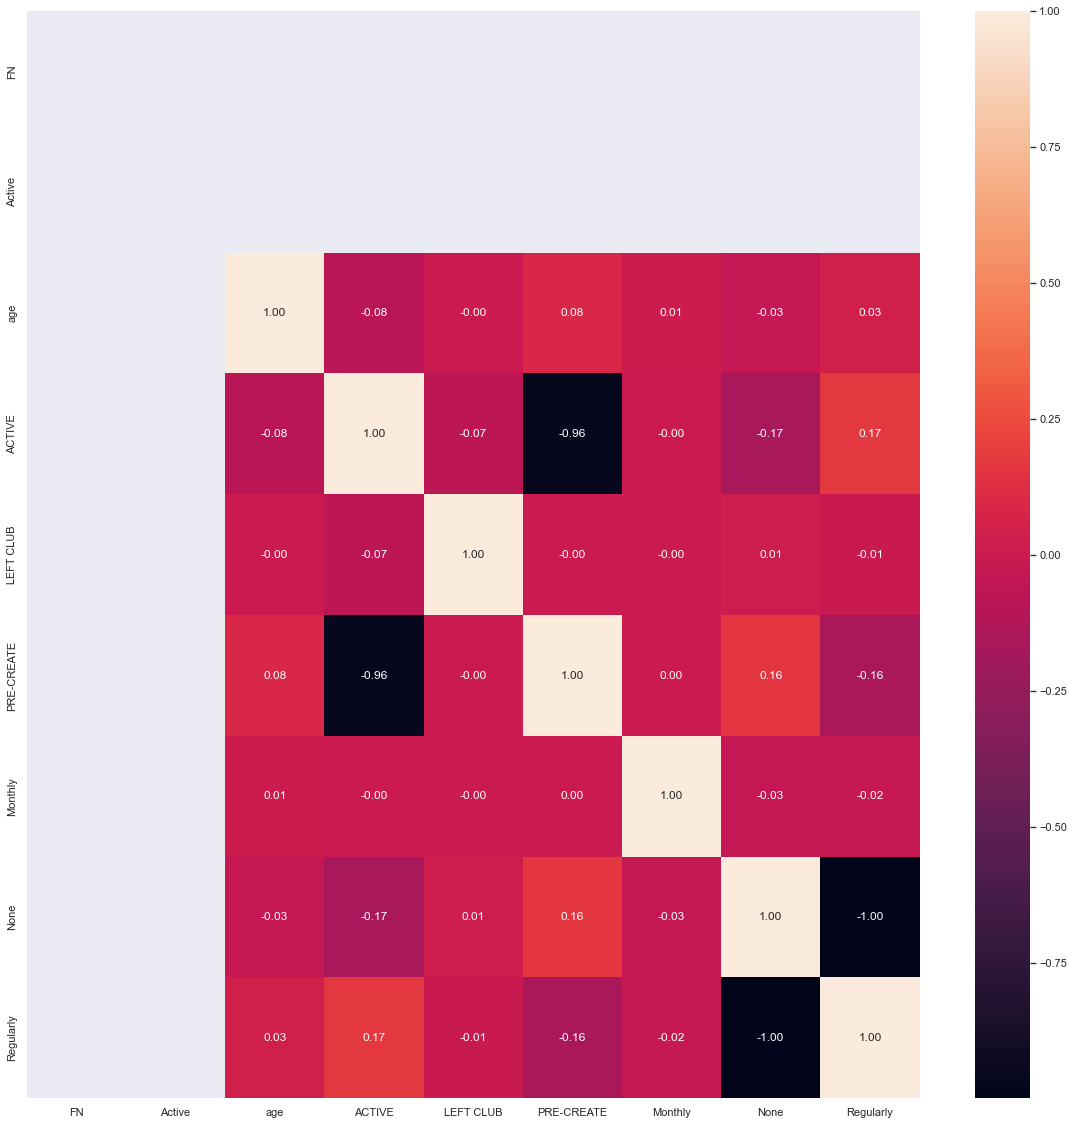

In [42]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(customers.corr(), annot = True, fmt= '.2f')

<AxesSubplot:>

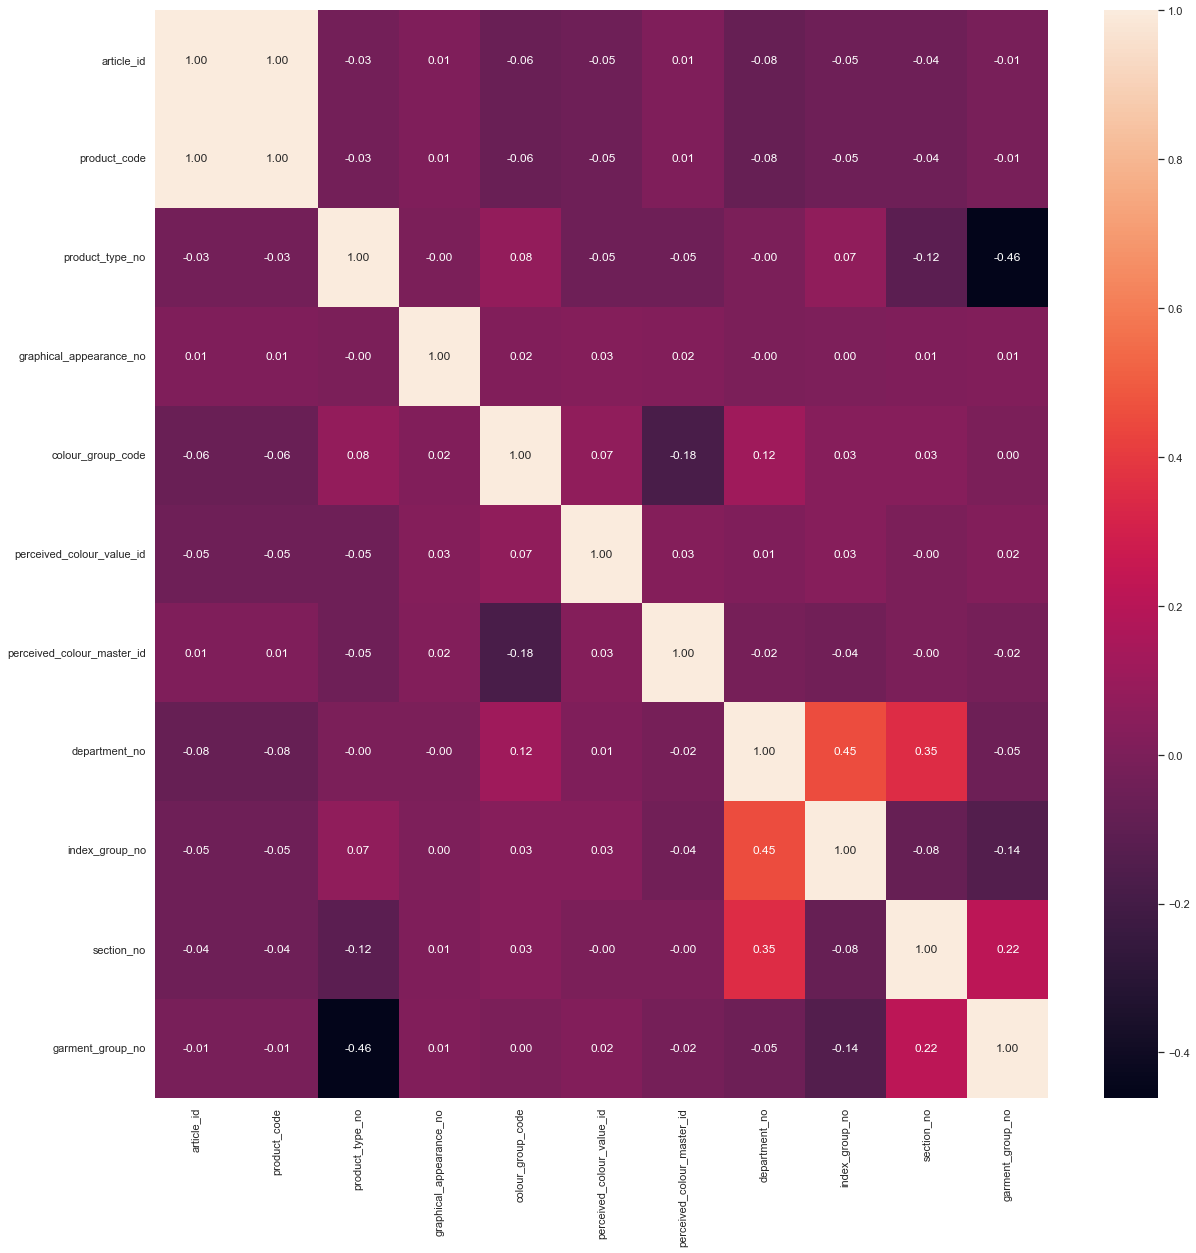

In [43]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(articles.corr(), annot = True, fmt= '.2f')

<AxesSubplot:>

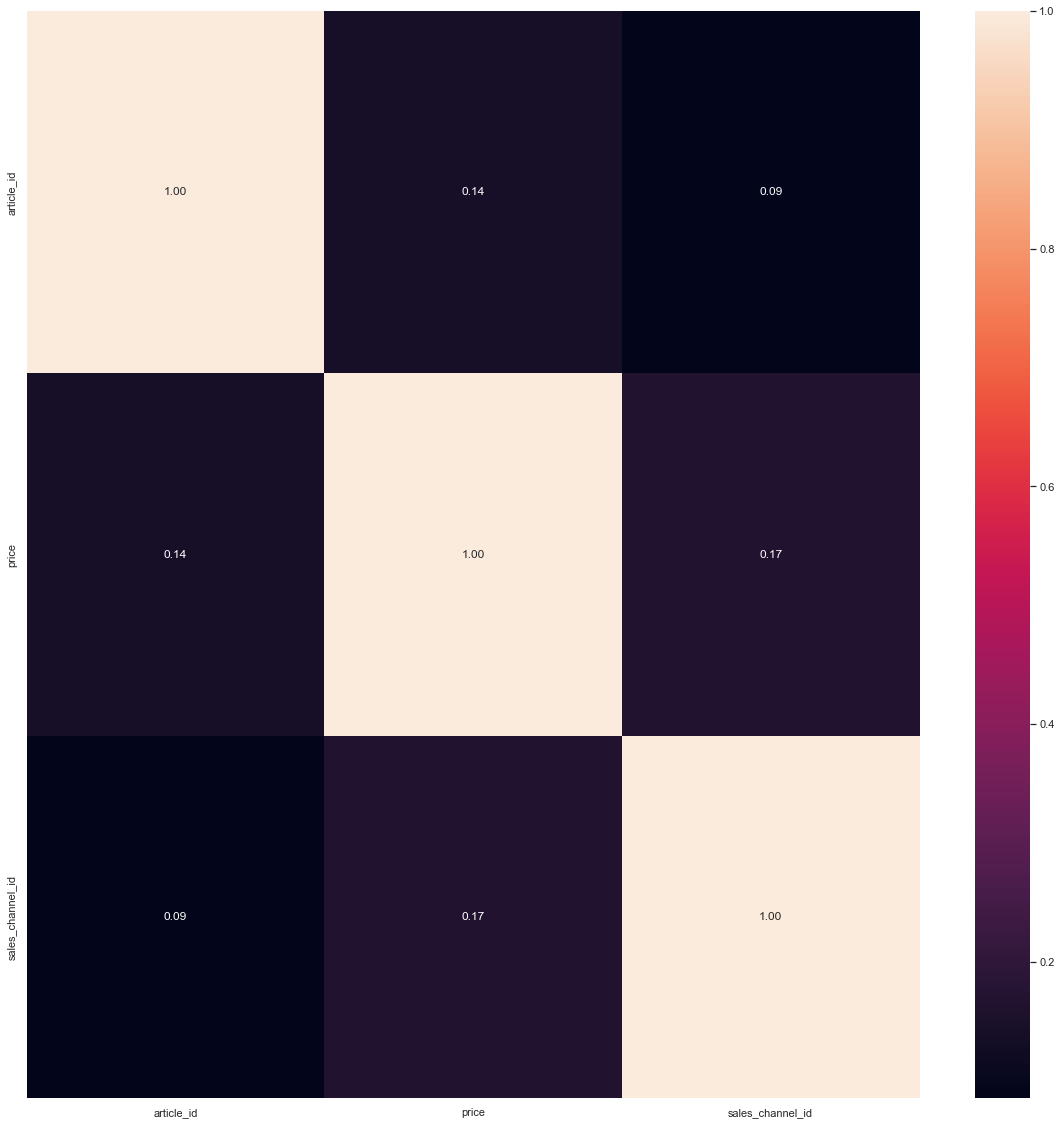

In [44]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(transactions_train.corr(), annot = True, fmt= '.2f')

Lets merge values from articles to transactions


In [48]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transactions_train[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.

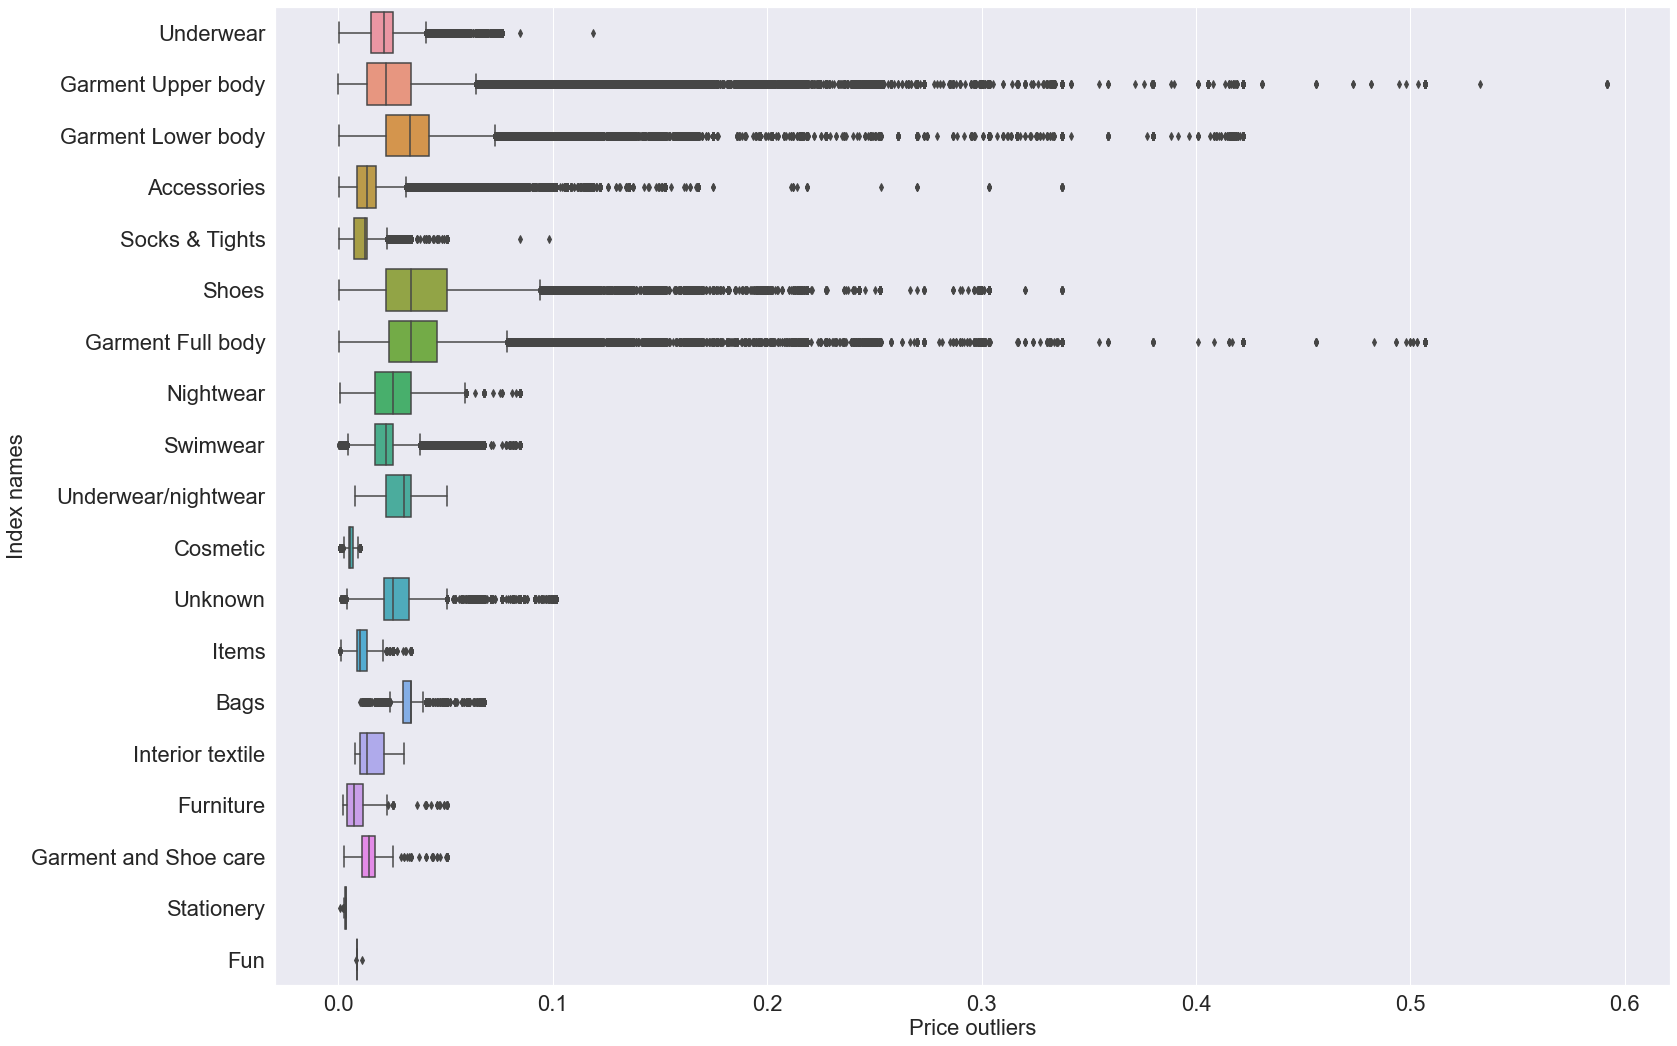

In [49]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.

The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.

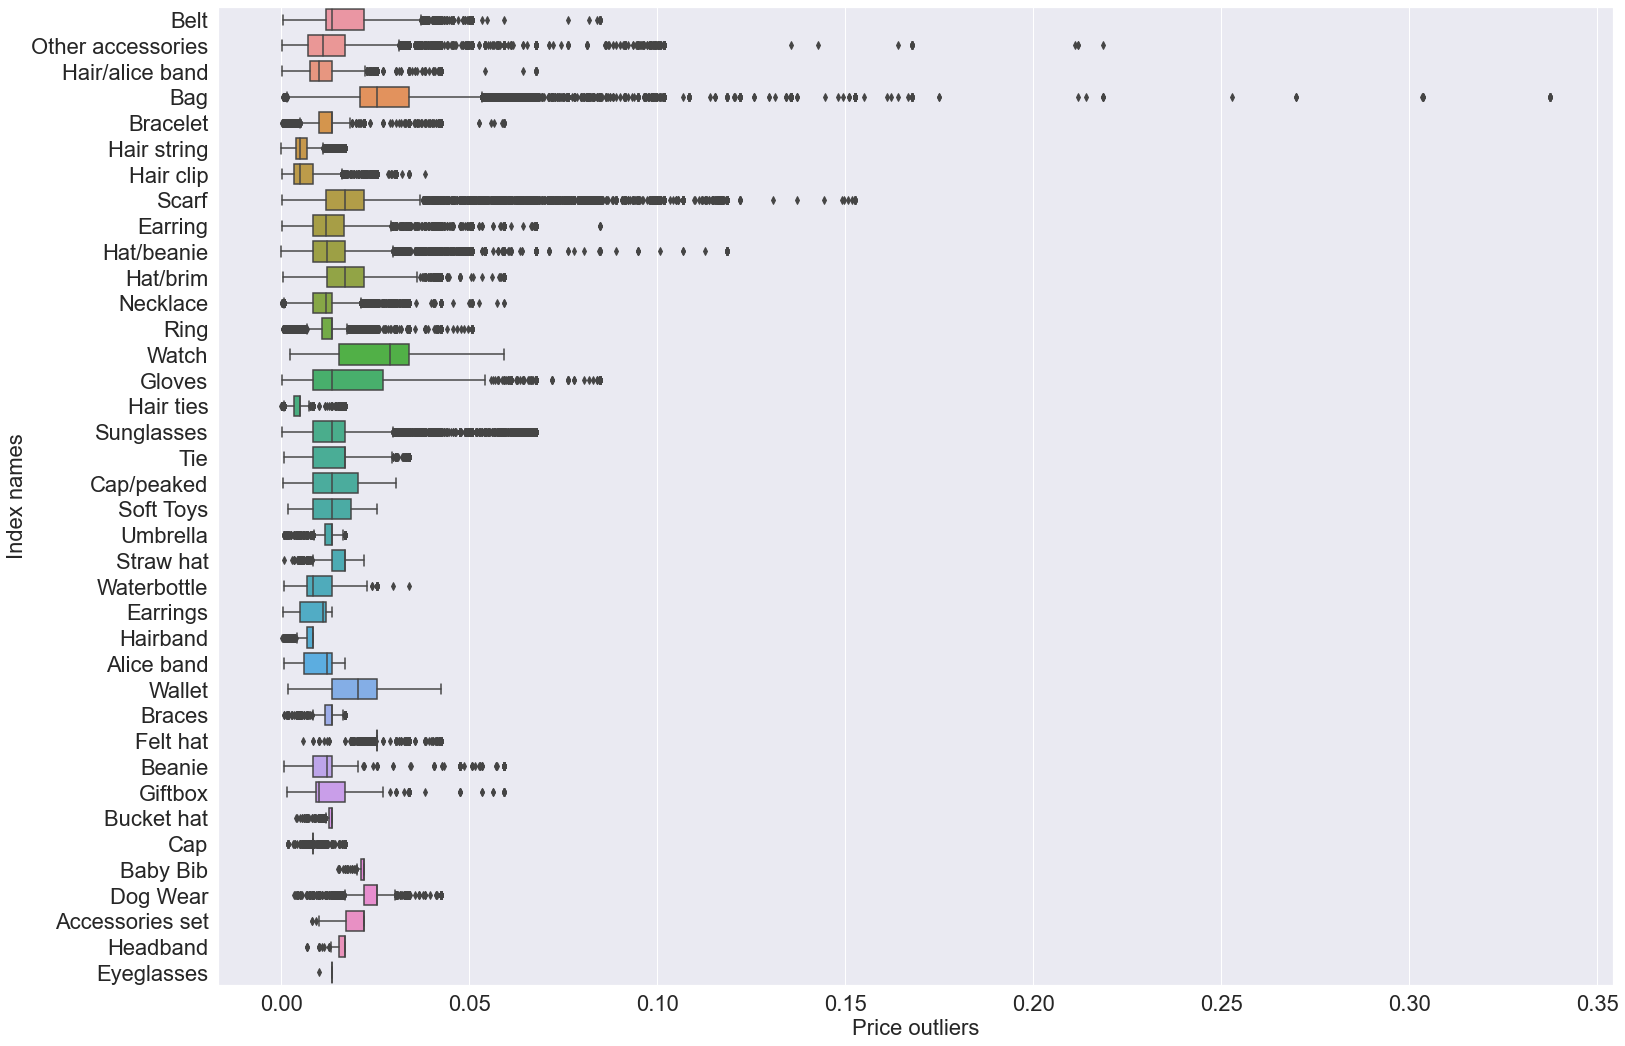

In [50]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

# ALS

In [3]:
fname_tran ='transactions_train.csv'
fname_cus ='customers.csv'
fname_article ='articles.csv'

In [7]:
data = pd.read_csv(fname_tran, sep=',')
data

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [8]:
using_cols = ['customer_id', 'article_id', 'price']
data = data[using_cols]
data.head(10)

,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932
5,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932
6,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322
7,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492
8,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373
9,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746


In [85]:
data.loc[:,'count'] = 1

C:\Users\kotav\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [9]:
data = data.groupby(['customer_id','article_id'], as_index=False).sum()
#because price is subordinated to article
data

,customer_id,article_id,price
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,0.035576
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,0.101661
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,0.050831
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008,0.012695
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,0.044051
...,...,...,...
27306434,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,821395003,0.016932
27306435,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,840360003,0.013542
27306436,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,866755002,0.094034
27306437,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,882810001,0.016932


In [18]:
user_unique = data['customer_id'].unique()
article_unique = data['article_id'].unique()
user_unique

array(['00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657',
       '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa',
       '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
       ...,
       'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264',
       'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a',
       'ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241'],
      dtype=object)

In [19]:
user_to_idx = {v:k for k,v in enumerate(user_unique)}
article_to_idx = {v:k for k,v in enumerate(article_unique)}

In [20]:
temp_user_data = data['customer_id'].map(user_to_idx.get).dropna()

if len(temp_user_data) == len(data):  
    print('no-null')
    data['customer_id'] = temp_user_data   
else:
    print('detect null')

temp_artist_data = data['article_id'].map(article_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('no-null')
    data['article_id'] = temp_artist_data
else:
    print('detect null')

data

no-null
no-null


,customer_id,article_id,price
0,0,0,0.035576
1,0,1,0.101661
2,0,2,0.050831
3,0,3,0.012695
4,0,4,0.044051
...,...,...,...
27306434,1362279,25311,0.016932
27306435,1362279,19415,0.013542
27306436,1362279,11208,0.094034
27306437,1362279,22321,0.016932


In [22]:
from scipy.sparse import csr_matrix

num_user = data['customer_id'].nunique()
num_artist = data['article_id'].nunique()

csr_data = csr_matrix((data['price'], (data.customer_id, data.article_id)), shape= (num_user, num_artist))
csr_data

<1362281x104547 sparse matrix of type '<class 'numpy.float64'>'
	with 27306439 stored elements in Compressed Sparse Row format>

In [25]:
from implicit.als import AlternatingLeastSquares as als_model
import os
import numpy as np

In [23]:
csr_data_transpose = csr_data.T
csr_data_transpose

<104547x1362281 sparse matrix of type '<class 'numpy.float64'>'
	with 27306439 stored elements in Compressed Sparse Column format>

In [28]:
als_model = AlternatingLeastSquares(factors=360, regularization=0.01,  iterations=5, dtype=np.float32, calculate_training_loss=True)

In [29]:
history = als_model.fit(csr_data_transpose)

  0%|          | 0/5 [00:12<?, ?it/s]

In [30]:
a_user, a_article = user_to_idx['000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'], article_to_idx[176209023]
a_user_vector, a_article_vector = als_model.user_factors[a_user], als_model.item_factors[a_article]


In [31]:
test_article = article_to_idx[176209023]
test_article_vector = als_model.item_factors[test_article]
np.dot(a_user, test_article_vector)

array([-1.61973864e-01,  2.14625075e-02, -9.16608982e-03,  2.43210606e-02,
        1.19988620e-01,  1.16322458e-01,  3.69125567e-02,  2.65908428e-02,
        6.40309229e-02, -9.29681882e-02, -6.67633936e-02,  7.34274983e-02,
        1.85342655e-01,  5.96005134e-02,  1.87821537e-01, -6.32410198e-02,
        3.17947641e-02, -2.68921275e-02,  1.07694201e-01, -3.86476181e-02,
        1.48274759e-02,  7.81972259e-02,  1.82543591e-01,  1.21615371e-02,
        7.58725405e-02, -5.67162149e-02,  1.64287705e-02,  5.91338426e-03,
        6.78245956e-03, -4.65890691e-02,  2.71581281e-02,  6.59420267e-02,
        4.23415154e-02,  4.89924662e-02,  2.99423821e-02,  6.51107877e-02,
        2.14567198e-03, -2.54441239e-02, -1.31583869e-01,  1.74049452e-01,
       -9.52900052e-02,  5.07599525e-02,  7.18745170e-03, -5.20170517e-02,
        4.06313315e-02, -4.67620380e-02, -9.01923608e-03, -5.27132340e-02,
       -6.01399504e-02,  6.16647163e-03, -1.38107970e-01, -3.26559618e-02,
        6.22810908e-02,  

In [32]:
a_test_article = 176209023
movie_id = article_to_idx[a_test_article]
similar_article = als_model.similar_items(movie_id, N=15)
similar_article

(array([      0,  801398,  256718,   42894,  974016,  325240, 1274023,
        1307280,  678837,  199161, 1287957, 1258053, 1135287,  427105,
        1043087]),
 array([1.        , 0.9956231 , 0.99117655, 0.99099624, 0.9909386 ,
        0.9907947 , 0.99073505, 0.9907201 , 0.9905528 , 0.9904918 ,
        0.98987186, 0.9896968 , 0.9896336 , 0.9896231 , 0.98960525],
       dtype=float32))

In [33]:
idx_to_article = {v:k for k,v in article_to_idx.items()}
j = [idx_to_article[i[0]] for i in similar_article]
print(j)

[176209023, 568601006]


# Prediction Submissions

In [35]:
data_R = pd.read_csv(fname_tran, sep=',')

In [36]:
submission=pd.read_csv('sample_submission.csv')

In [37]:
users_sub = submission.drop_duplicates(['customer_id'], keep = 'first', ignore_index = True)
users_sub

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


As you can see the model has an efficiency of over 70%